In [2]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from plotter import Plotter
%matplotlib inline

Set the directory of the records and the save path of the plot. For example, if one want to plot the result of BIBD model and BIBD&GC model, one needs to modify the codes of the $\#\#$ blocks.

`records = 20
epoches = 75
path = './figures/ResNet_BIBD_BIBD&GC.png'
models = ['BIBD', "BIBD_GC"]
`

The names in the `models` should be consistent with the result folder name.

In [17]:
############################################################################
## set the number of records
records = 20

## set the number of epoches in each records
epoches = 75
                                                                   
## set the save path of the figures                         
path = './figures/ResNet_EE_models.png'                                   
## set the dir name of the records                                           
models = ['EE','EE_BIBD', 'GC_EE', 'BIBD_EE_GC']                                      
labels = ['EE_3', 'EE_1', 'EE_2', 'EE_BIBD_3', 'EE_BIBD_2', 'EE_BIBD_3', 
          'EE_GC_3', 'EE_GC_1', 'EE_GC_2', 'EE_BIBD_GC_3', 'EE_BIBD_GC_1', 'EE_BIBD_GC_2'] 
                                                                       
############################################################################

train_acc_files = ['./results/'+name+'/train_acc_' for name in models]
train_loss_files = ['./results/'+name+'/train_loss_' for name in models]
test_acc_files = ['./results/'+name+'/test_acc_' for name in models]
test_loss_files = ['./results/'+name+'/test_loss_' for name in models]
labels = np.array(labels)

train_acc = None
train_loss = None
test_acc = None
test_loss = None

for n in range(len(models)):
    train_acc_temp = 0
    train_loss_temp = 0
    test_acc_temp = 0
    test_loss_temp = 0
    for i in range(20): # accumulate models[n]'s 20 results
        train_acc_temp += genfromtxt(train_acc_files[n] + str(i + 1) + '.csv', delimiter = ',').reshape(epoches,-1)
        train_loss_temp += genfromtxt(train_loss_files[n] + str(i + 1) + '.csv', delimiter = ',').reshape(epoches,-1)
        test_acc_temp += genfromtxt(test_acc_files[n] + str(i + 1) + '.csv', delimiter = ',').reshape(epoches,-1)
        test_loss_temp += genfromtxt(test_loss_files[n] + str(i + 1) + '.csv', delimiter = ',').reshape(epoches,-1)
    # taking average
    if type(train_acc) != type(train_acc_temp):
        train_acc = train_acc_temp / records
        train_loss = train_loss_temp / records
        test_acc = test_acc_temp / records
        test_loss = test_loss_temp / records
    else:
        train_acc = np.append(train_acc, (train_acc_temp / records).reshape(epoches,-1), 1)
        train_loss = np.append(train_loss, (train_loss_temp / records).reshape(epoches,-1), 1)
        test_acc = np.append(test_acc, (test_acc_temp / records).reshape(epoches,-1), 1)
        test_loss = np.append(test_loss, (test_loss_temp / records).reshape(epoches,-1), 1)

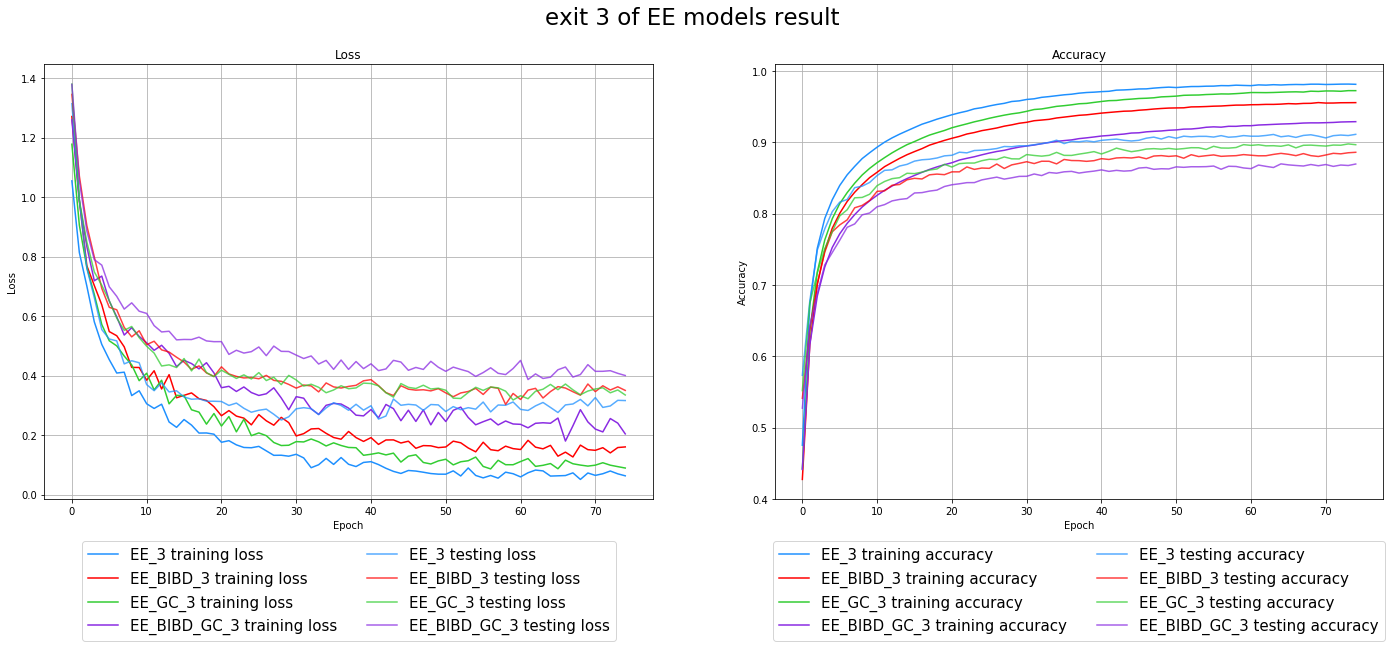

In [21]:
############################################################################

plotter = Plotter(title="exit 3 of EE models result",
                         save_to_filepath='./figures/EE_models_3.png')                           
plotter.plot_values(np.take(labels,[0,3,6,9]), train_loss[:,[0,3,6,9]], test_loss[:,[0,3,6,9]], 
                    train_acc[:,[0,3,6,9]], test_acc[:,[0,3,6,9]])  

############################################################################

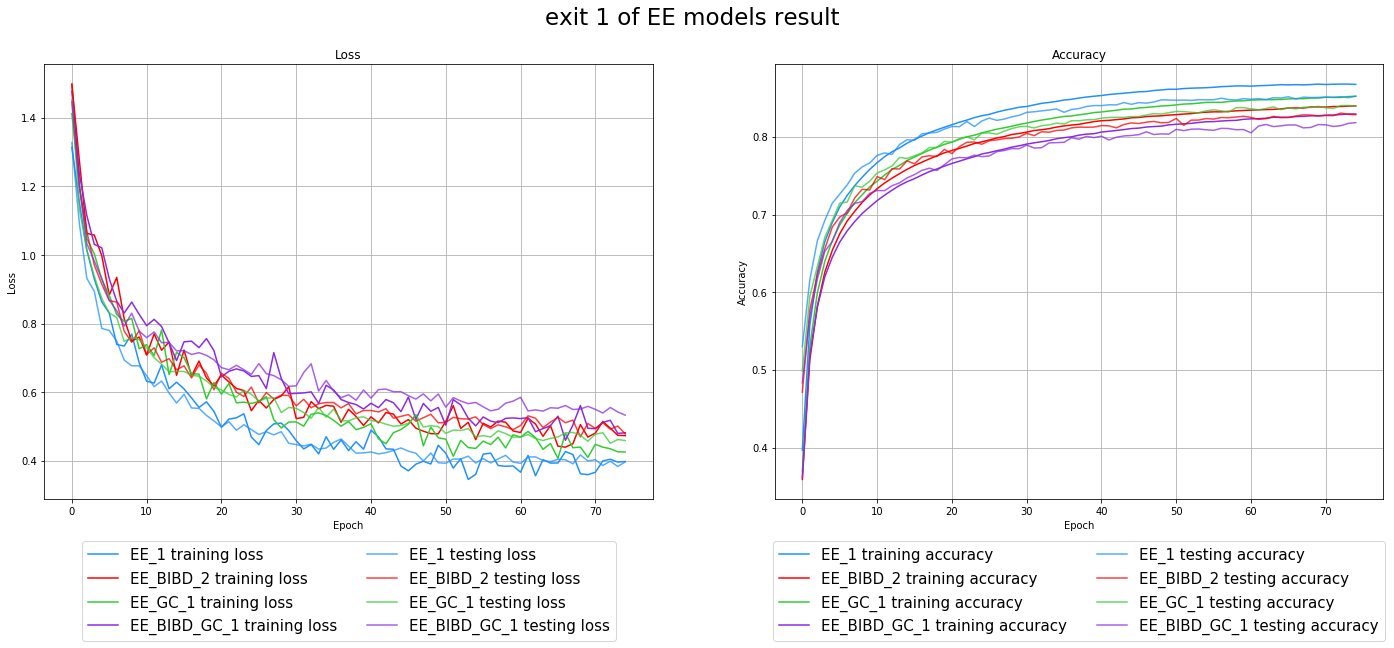

In [19]:
############################################################################

plotter = Plotter(title="exit 1 of EE models result",
                         save_to_filepath='./figures/EE_models_1.png')                           
plotter.plot_values(np.take(labels,[1,4,7,10]), train_loss[:,[1,4,7,10]], test_loss[:,[1,4,7,10]], 
                    train_acc[:,[1,4,7,10]], test_acc[:,[1,4,7,10]])  

############################################################################

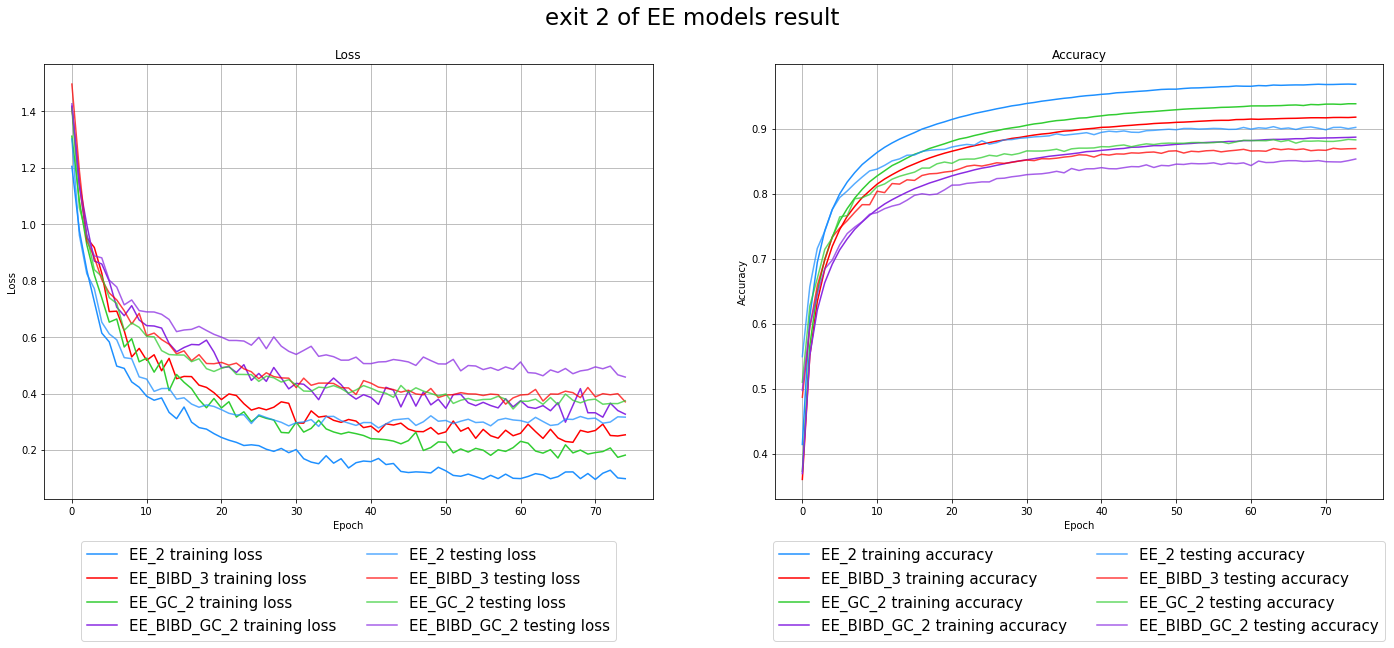

In [20]:
############################################################################

plotter = Plotter(title="exit 2 of EE models result",
                         save_to_filepath='./figures/EE_models_2.png')                           
plotter.plot_values(np.take(labels,[2,5,8,11]), train_loss[:,[2,5,8,11]], test_loss[:,[2,5,8,11]], 
                    train_acc[:,[2,5,8,11]], test_acc[:,[2,5,8,11]])  

############################################################################

In [15]:
print (train_loss[74,:])

[0.0642395 0.398345  0.0984695 0.16138   0.473635  0.253759  0.090415
 0.426025  0.181835  0.20511   0.48211   0.32684  ]


In [7]:
print (train_acc[74,:])

[0.981445 0.86769  0.968205 0.95576  0.83992  0.917635 0.97254  0.852365
 0.93826  0.929065 0.829585 0.88686 ]


In [8]:
print (test_loss[74,:])

[0.317185 0.39717  0.31629  0.35126  0.47866  0.370545 0.335835 0.459415
 0.37458  0.40131  0.533285 0.45829 ]


In [9]:
print (test_acc[74,:])

[0.911305 0.852535 0.90189  0.886145 0.82873  0.86923  0.89679  0.840095
 0.88271  0.869705 0.818455 0.853225]


In [19]:
path = './results/BIBD_GC/'
train_time = 0
test_time = 0
for i in range(1,21):
    train_time += genfromtxt(path + 'train_time_' + str(i) + '.csv', delimiter = ',')
    test_time += genfromtxt(path + 'test_time_' + str(i) + '.csv', delimiter = ',')
train_time = train_time / 20
test_time = test_time / 20
print (train_time[-1])
print (test_time[-1])

23497.5
1757.6


### Last Week Output

|Model|Training Time(ms)|Inference Time(ms)|
|:---:|:---:|:---:|
|Resnet|28641.0|2071.72|
|BIBD|28843.5|2116.1|
|GC|21508.0|1499.85|
|BIBD & GC|23497.5|1757.6|

|Model|Exit 1 Inference Time(ms)| Exit 2 Inference Time(ms)|
|:---:|:---:|:---:|
|EE|706.75|707.37|
|EE_BIBD|744.515|745.535|
|GC_EE|904.4$^\ast$|905.3$^\ast$|
|BIBD_GC_EE|1266$^\ast$|1267$^\ast$|

*Note:* $\ast$ means the experiment still running, so it is not the final version.

### Next Week Plan

|Work|Expected output|Data|
|:---:|:---|:---:|
|1. # of params, FLOPs calculation of ResNet models|a. A formula that expresses to what<br>extent our BIBD sparsification achieves;<br>b. Find the way to calculate the FLOPs;|4.30|


In [28]:
path = './results/GC_EE/'
test_time = 0
for i in range(1,3):
    test_time += genfromtxt(path + 'test_time_' + str(i) + '.csv', delimiter = ',')
train_time = train_time / 2
test_time = test_time / 2
print (test_time[-1,:])

[904.4 905.3]
